# CAPSTONE - Accident Severity Prediction 

## Goal : To predict the severity of the accident.

UK Road Safety: Traffic Accidents and Vehicles
This notebook contains files produced for my IBM Coursera Data Science Capstone Project

## Content

Primarily Captures Road Accidents in UK between 1979 and 2015 and has 70 features/columns and about 250K rows.
Dataset has been fetched from Oprn data and the files have been merged and cleaned to reach the final data attached.
Along with it was an excel file with Multiple Tabs that can help one to understand the Data (which will be labelled clearly here for better understanding).

## Acknowledgements and DataSource
Data has been fetched from Open Data Platform UK and is being shared under Open Government Licence.
For more details refer to Open Data UK

The data set was uploaded to Kaggle under the profile.

https://www.kaggle.com/akshay4/road-accidents-incidence![image.png](attachment:image.png)

### Table of contents
<li>1.Load the Data</li> </br>
<ol>1.1 Import Libraries</ol></br>
<ol>1.2 Load dataset</ol></br></li>
</br>
<li>2. Summarize the Dataset (DATA PREPARATION)</br>
<ol>2.1  Dimension of the data</ol></br>
<ol>2.2  Peak at the data</ol></br>
<ol>2.3  Statistical summary</ol></li></br>
</br>
<li>3. Data Visualisation (MODELLING) </br>
<ol>3.1  Multivariate Plots</ol></li></br>
</br>
<li>4. Evaluate some algorithmns (EVALUATION)</li>
</br></br>
<li>5. Making Predictions (DEPLOYMENT)</li></br>

# DATA PREPARATION

## Load the Data Set
### 70 features/columns and about 250K rows.

In [2]:
# The dataset has been added to the env folder in the local disk which was downloaded from Kaggle dataset. 

## Importing Libraries

In [4]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
plt.style.use("dark_background")

from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, jaccard_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
#cheking the imported raw dataset and getting familiarised with the attributes
raw_df = pd.read_csv("Kaagle_Upload.csv")
raw_df.head()

F:\DL_env\IBM_Project\env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summarize the Data

In [6]:
raw_df.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)

In [8]:
#Dimension of the Dataset
raw_df.shape

(285331, 70)

In [9]:
#Statistical Summary
raw_df.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,...,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000
mean,1.557030,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,...,6.245512,2.862462,0.672277,0.481631,0.255992,0.079383,0.060428,7.277414,1.045665,3.848236
std,0.760106,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1.393303,2.168011,...,2.386162,0.370414,1.951045,1.663396,0.575932,0.534076,0.345463,7.506004,0.959294,3.491443
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


#### Predictive value for the context of this project are already given, therefore the attributes with no predictive dataset are dropped.

In [10]:
df = raw_df.drop(columns = ['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'])
df.head(10)

,accident_severity,light_conditions,weather_conditions,road_surface_conditions
0,3,1,1,1
1,3,1,1,1
2,3,1,1,1
3,3,1,1,1
4,3,1,1,1
5,3,1,1,1
6,3,7,1,1
7,3,7,1,1
8,3,1,1,1
9,3,4,1,1


### Balancing the given data

In [12]:
df["accident_severity"].value_counts()


3    242477
2     39206
1      3648
Name: accident_severity, dtype: int64

In [13]:
df["light_conditions"].value_counts()


1    210534
4     55412
6     14256
7      3699
5      1430
Name: light_conditions, dtype: int64

In [14]:
df["weather_conditions"].value_counts()


1    233216
2     31375
4      4716
9      4699
5      4627
8      3887
7      1404
3      1050
6       357
Name: weather_conditions, dtype: int64

In [15]:
df["road_surface_conditions"].value_counts()

 1    207682
 2     73161
 4      2572
 3      1034
-1       545
 5       337
Name: road_surface_conditions, dtype: int64

#### Checking for the missing values

In [16]:
df.replace("?", np.nan, inplace = True)
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

accident_severity
False    285331
Name: accident_severity, dtype: int64

light_conditions
False    285331
Name: light_conditions, dtype: int64

weather_conditions
False    285331
Name: weather_conditions, dtype: int64

road_surface_conditions
False    285331
Name: road_surface_conditions, dtype: int64



### From the above line of code and its output we understand the following:
Using a for loop in Python, we can quickly figure out the number of missing values in each column. "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values. </br>

From the above we observe that the given dataset does not have any missing values. </br>

The severity code 3 is almost 80 times that of severity code 1 and 6 times when compared with severity code 2

In [17]:
# Seperate majority and minority classes
df_majority = df[df.accident_severity==3]
df_minority = df[df.accident_severity==1]

#Downsample majority class
df_majority_downsampled = resample(df_majority,
                                        replace=False,
                                        n_samples=3648,
                                        random_state=1234)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_balanced.accident_severity.value_counts()

3    3648
1    3648
Name: accident_severity, dtype: int64

In [18]:
df_balanced.head()

,accident_severity,light_conditions,weather_conditions,road_surface_conditions
61211,3,1,1,1
238619,3,1,2,2
104367,3,1,1,1
245665,3,1,1,1
66952,3,1,1,1


### Data Visualization 


We now have a basic idea about the data. We need to extend that with visualizations.

Multivariate plots to better understand the relationships between attributes.

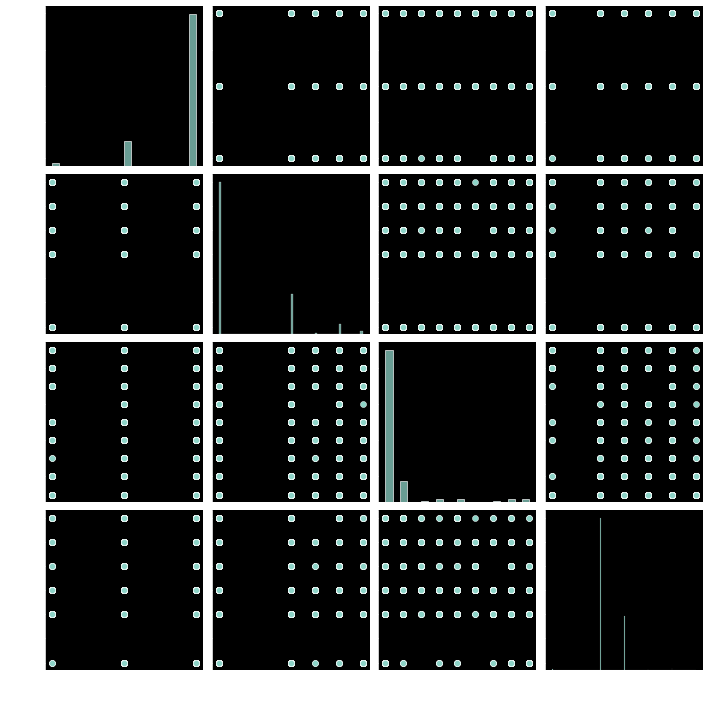

In [20]:
sns.pairplot(df)

## MODELLING

In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. I have selected decision tree, KNN , Linear Regression and .  At this phase, stepping back to the data preparation phase was often required.

Methodology 
Our data is now ready to be fed into machine learning models.

We will use the following models:

K-Nearest Neighbor (KNN)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the consequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

Logistic Regression
Because our dataset only provides us with three severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

In [21]:
X = np.asarray(df_balanced[['light_conditions', 'weather_conditions', 'road_surface_conditions']])
X[0:5]

array([[1, 1, 1],
       [1, 2, 2],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [22]:
y = np.asarray(df_balanced['accident_severity'])
y [0:5]

array([3, 3, 3, 3, 3], dtype=int64)

In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.64312226, -0.33631746, -0.55664741],
       [-0.64312226,  0.32974448,  1.24998048],
       [-0.64312226, -0.33631746, -0.55664741],
       [-0.64312226, -0.33631746, -0.55664741],
       [-0.64312226, -0.33631746, -0.55664741]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5107, 3) (5107,)
Test set: (2189, 3) (2189,)


In [25]:
k = 25
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([3, 3, 3, 1, 3], dtype=int64)

## Model Building

In [28]:
#Decision Tree
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
print(colDataTree.fit(X_train,y_train))

#Logistic Regression
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR


DecisionTreeClassifier(criterion='entropy', max_depth=7)


LogisticRegression(C=6, solver='liblinear')

### Training the model 

In [27]:
DTyhat = colDataTree.predict(X_test)
print (DTyhat[0:5])
print (y_test[0:5])
LRyhat = LR.predict(X_test)
LRyhat

[3 3 3 1 3]
[1 3 3 3 3]


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

## Prediction

In [30]:
LRyhat = LR.predict(X_test)
print(LRyhat)
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

[3 3 3 ... 3 3 3]
[[0.43177863 0.56822137]
 [0.43177863 0.56822137]
 [0.43177863 0.56822137]
 ...
 [0.43177863 0.56822137]
 [0.43177863 0.56822137]
 [0.43177863 0.56822137]]


## Evaluation


In [32]:
model_rf = RandomForestClassifier(n_estimators=10, max_features=3, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
yhat_rf = model_rf.predict(X_test)
jaccard_rf = jaccard_score(y_test,yhat_rf)
c_rf = classification_report(y_test,yhat_rf)
prec_rf = precision_score(y_test, yhat_rf)
rec_rf = recall_score(y_test, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)



Jaccard : 0.3271317829457364 
               precision    recall  f1-score   support

           1       0.70      0.38      0.49      1106
           3       0.57      0.83      0.67      1083

    accuracy                           0.60      2189
   macro avg       0.63      0.61      0.58      2189
weighted avg       0.63      0.60      0.58      2189



## Results

In [42]:
print(jaccard_score(y_test, Kyhat))
print(f1_score(y_test, Kyhat, average='macro'))
print(jaccard_score(y_test, DTyhat))
print(jaccard_score(y_test, LRyhat))
yhat_prob = LR.predict_proba(X_test)
result = log_loss(y_test, yhat_prob)

df_results = pd.DataFrame({'Algorithmn': ['KNN',
                                          'Decision Tree', 
                                          'Logistics Regression',
                                          'Random Forest'],
                           'Jaccard': [jaccard_score(y_test, Kyhat),
                                       jaccard_score(y_test, DTyhat),
                                       jaccard_score(y_test, LRyhat),
                                       jaccard_rf],
                           'F1-Score': [f1_score(y_test, Kyhat, average="macro"),
                                       f1_score(y_test, DTyhat, average="macro"),
                                       f1_score(y_test, LRyhat, average="macro"),
                                       result]})
df_results.head()

0.28604651162790695
0.5530594098058867
0.32684824902723736
0.3037518037518038


,Algorithmn,Jaccard,F1-Score
0,KNN,0.286047,0.553059
1,Decision Tree,0.326848,0.584531
2,Logistics Regression,0.303752,0.545313
3,Random Forest,0.327132,0.678183


### With no doubt the Random Forest is the best model, in the same time as the log. res. It improves the accuracy from 0.28 to 0.32 and the f1-score from 0.545 to 0.67.

### Random forests consist of multiple single trees each based on a random sample of the training data. 

### They are typically more accurate than single decision trees.

### The above results shows the decision boundary becomes more accurate and stable as more trees are added.

In [43]:
df_results.head()

,Algorithmn,Jaccard,F1-Score
0,KNN,0.286047,0.553059
1,Decision Tree,0.326848,0.584531
2,Logistics Regression,0.303752,0.545313
3,Random Forest,0.327132,0.678183


# Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algorithm, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made the most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyperamater C values helped to improve our accuracy to be the best possible